In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "data/2 - Scenario DA2/xmeas7_zero_data_1.csv"
columnIndex = 4

In [3]:
rows = []
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        rows.append(row) 
print("Total no. of rows: %d"%(csvreader.line_num)) 
print(len(rows[0]))
train = np.array((500, 41))
thresholdData = np.array((3500, 41))
test = np.array((800, 41))
allData = np.array((4800,41))
train = np.array(rows[:500])
thresholdData = np.array(rows[500:4000])
test = np.array(rows[4000:4800])    
allData=np.array(rows[:-1])

Total no. of rows: 4801
41


In [4]:
print(train.shape)
print(thresholdData.shape)
print(test.shape)
print(allData.shape)

(500, 41)
(3500, 41)
(800, 41)
(4800, 41)


# Training phase

In [5]:
n = 500 
l = 250
k = n-l+1
X = np.zeros((l,k))   # Trajectory matrix
sensorReadings = np.transpose(train)[columnIndex] # taking first 500 sensor readings to get U
trainSensorReadings = sensorReadings
print(X.shape)
for i in range(l):
    X[i]=sensorReadings[i:i+k]

(250, 251)


In [6]:
meanX = np.mean(X,axis=1) 
print(meanX.shape)

(250,)


In [7]:
# SVD for trajectory matrix
U, S, V  = np.linalg.svd(X, full_matrices=True)

In [8]:
print(U.shape)
print(S.shape)
print(S)

(250, 250)
(250,)
[8.06435902e+03 6.53224716e+00 6.52622385e+00 6.46143370e+00
 6.44924645e+00 6.21793218e+00 6.20497158e+00 5.95425910e+00
 5.92603811e+00 5.58793110e+00 5.54779874e+00 5.53049094e+00
 5.47748584e+00 5.46515157e+00 5.43179983e+00 5.42184994e+00
 5.37393134e+00 5.37221909e+00 5.36632667e+00 5.35333691e+00
 5.31599961e+00 5.30618270e+00 5.30036816e+00 5.29191417e+00
 5.28350527e+00 5.28106324e+00 5.27381004e+00 5.25961274e+00
 5.22436531e+00 5.16029493e+00 5.09248321e+00 5.07492426e+00
 5.00836720e+00 4.78294920e+00 4.74329190e+00 4.73047003e+00
 4.68556099e+00 4.62151342e+00 4.61009413e+00 4.60441865e+00
 4.59054115e+00 4.58286222e+00 4.57856843e+00 4.56798001e+00
 4.53364408e+00 4.49707744e+00 4.49110723e+00 4.48346374e+00
 4.44048671e+00 4.32042334e+00 4.30740315e+00 4.27443463e+00
 4.27266666e+00 4.25995704e+00 4.23954096e+00 4.20459163e+00
 4.19303124e+00 4.16887121e+00 4.14524425e+00 4.10121368e+00
 4.09728707e+00 4.06564094e+00 4.05620792e+00 4.04211069e+00
 4.038

In [9]:
#choose r=1 
newU = U[:,0:1]

In [10]:
print(newU.shape)

(250, 1)


# Determining theta (threshold)

In [11]:
n = 3500
k = n-l+1
X = np.zeros((l,k))
sensorReadings = np.transpose(thresholdData)[columnIndex]
thresholdSensorReadings = sensorReadings
# print(len(sensorReadings))
print(X.shape)
for i in range(l):
    X[i]=sensorReadings[i:i+k]


(250, 3251)


In [12]:
projectedCentre = np.dot(newU.T,meanX)  #finding projection for meanX
print(projectedCentre)

[-509.01781324]


In [13]:
departureScores=np.zeros((k,1)) # departure scores for lag vectors
for i in range(k):
    x_i=np.array([X[j][i] for j in range(l)])
    departureScores[i] = np.dot(projectedCentre - np.dot(newU.T,x_i),projectedCentre - np.dot(newU.T,x_i))

In [14]:
print(max(departureScores))

[0.24189112]


In [15]:
threshold = max(departureScores) + 0.02 # setting threshold as max of departure score + small constant

# Testing phase

In [16]:
n = 800
k = n-l+1
X = np.zeros((l,k))
testSensorReadings = np.transpose(test)[columnIndex]
print(len(testSensorReadings))
print(X.shape)
for i in range(l):
    X[i] = testSensorReadings[i:i+k]

800
(250, 551)


In [17]:
testDepartureScores = np.zeros((k,1))
for i in range(k):
    x_i = np.array([X[j][i] for j in range(l)])
    testDepartureScores[i] = np.dot(projectedCentre - np.dot(newU.T,x_i), projectedCentre - np.dot(newU.T,x_i))
print(testDepartureScores.shape)

(551, 1)


# Plot of departure scores

In [18]:
n = 4800
k = n-l+1
X = np.zeros((l,k))
testSensorReadings = np.transpose(allData)[columnIndex]
print(X.shape)
for i in range(l):
    X[i] = testSensorReadings[i:i+k]
finalDepartureScores = np.zeros((k,1))
for i in range(k):
    x_i = np.array([X[j][i] for j in range(l)])
    finalDepartureScores[i] = np.dot(projectedCentre - np.dot(newU.T,x_i), projectedCentre - np.dot(newU.T,x_i))
print(finalDepartureScores.shape)

(250, 4551)
(4551, 1)


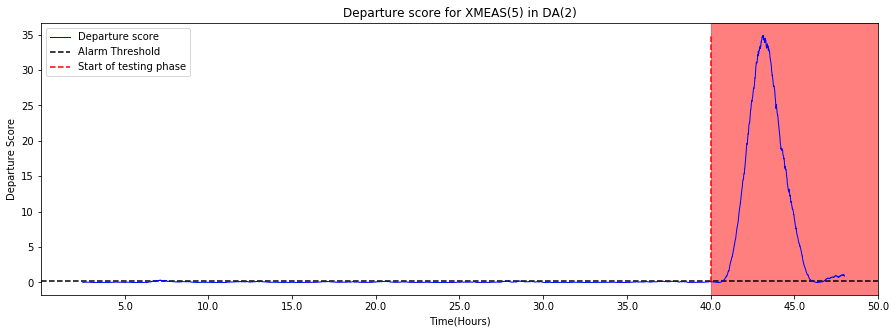

In [20]:
fig = plt.figure(figsize=(15,5))
x=[i for i in range(250,4801)]
plt.plot(x,finalDepartureScores , 'b-', linewidth=1, label='Departure score')
locs = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
xlabels = [locs[i]/100 for i in range(len(locs))]
plt.xticks(locs, xlabels)
plt.xlabel('Time(Hours)')
plt.ylabel('Departure Score')
plt.margins(x=0)
plt.hlines(threshold, 0, 5000, linestyles='dashed', label='Alarm Threshold')
plt.vlines(4000, 0,max(testDepartureScores) , linestyles='dashed', colors='red', label='Start of testing phase')
plt.axvspan(4000, 5000, alpha=0.5, color='red')
plt.title('Departure score for XMEAS(5) in DA(2)')
plt.legend()
plt.show()

# Plot of all readings for XMEAS(5) sensor

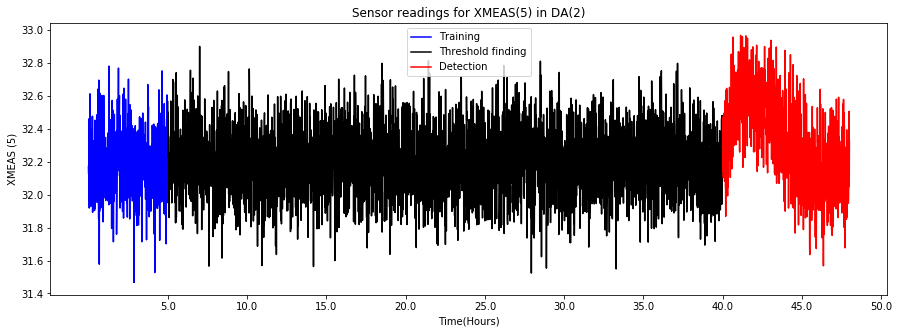

In [21]:
x1 = [i for i in range(500)]
x2 = [i for i in range(500,4000)]
x3 = [i for i in range(4000,4800)]
fig = plt.figure(figsize=(15,5))
sensorReadings = np.transpose(allData)[columnIndex]
plt.plot(x1, sensorReadings[:500], 'b-',label='Training')
plt.plot(x2, sensorReadings[500:4000],'k-' , label = 'Threshold finding')
plt.plot(x3, sensorReadings[4000:4800],'r-',label = 'Detection')
locs = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
xlabels = [locs[i]/100 for i in range(len(locs))]
plt.xticks(locs, xlabels)
plt.xlabel('Time(Hours)')
plt.ylabel('XMEAS (5)')
plt.title('Sensor readings for XMEAS(5) in DA(2)')
plt.legend()
plt.show()